<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/L2_Numerical_differentiation_and_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical differentiation and integration

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences, submitted.
<br>
<br>

Like other numerical methods, numerical differentiation and integration are useful when analytic operations are impossible or difficult. They are also commonly used for solving partial differential equations.

####Differentiation using finite differences

Finite differences use approximations for the derivatives derived from the truncated *Taylor series*.

#####Taylor series

\begin{split}
  f\,(x\,+\,h)
  \,&=\,f\,(x)\,+\,f'\,(x)\,h
  \,+\,\frac{f''\,(x)\,h^{2}}{2!}
  \,+\,\frac{f'''\,(x)\,h^{3}}{3!}
  \,+\,...
  \,+\,\frac{f_{n}\,(x)\,h^{n}}{n!}\\\\
  f\,(x\,-\,h)
  \,&=\,f\,(x)\,-\,f'\,(x)\,h
  \,+\,\frac{f''\,(x)\,h^{2}}{2!}
  \,-\,\frac {f'''\,(x)\,h^{3}}{3!}
  \,+\,...
  \,+\,(-1)^n\,\frac{f_{n}\,(x)\,h^{n}}{n!}
\end{split}
<br>
<br>

#####Forward approximation

\begin{equation}
  \frac{f(x\,+\,h)\,-\,f\,(x)}{h}
  \,=\,f'\,(x)
  \,+\,O\,(h)
\end{equation}
<br>
<br>

#####Backward approximation

\begin{equation}
  \frac{f(x)\,-\,f(x\,-\,h)}{h}
  \,=\,f'\,(x)
  \,+\,O\,(h)
\end{equation}
<br>
<br>

#####Central approximation

\begin{equation}
  \frac{f(x\,+\,h)\,-\,f\,(x\,-\,h)}{2h}
  \,=\,f'\,(x)
  \,+\,O\,(h^2)
\end{equation}
<br>
<br>

#####More Taylor series

\begin{split}
  f\,(x\,+\,2\,h)
  \,&=\,f\,(x)\,+\,f'\,(x)\,2\,h
  \,+\,\frac{f''\,(x)\,(2\,h)^{2}}{2!}
  \,+\,\frac{f'''\,(x)\,(2\,h)^{3}}{3!}
  \,+\,...
  \,+\,\frac{f_{n}\,(x)\,(2\,h)^{n}}{n!}\\\\
  f\,(x\,-\,2\,h)
  \,&=\,f\,(x)\,-\,f'\,(x)\,2\,h
  \,+\,\frac{f''\,(x)\,(2\,h)^{2}}{2!}
  \,-\,\frac{f'''\,(x)\,(2\,h)^{3}}{3!}
  \,+\,...
  \,+\,(-1)^n\,\frac{f_{n}\,(x)\,(2\,h)^{n}}{n!}
\end{split}
<br>
<br>

#####Second order forward approximation

\begin{equation}
  \frac{-f\,(x\,+\,2\,h)\,+\,4\,f\,(x\,+\,h)\,-\,3\,f\,(x)}{2\,h}
  \,=\,f'\,(x)
  \,+\,O\,(h^{2})
\end{equation}
<br>
<br>

#####Second order backward approximation

\begin{equation}
  \frac{3\,f\,(x)\,-\,4\,f\,(x\,-\,h)\,+\,f\,(x\,-\,2\,h)}{2\,h}
  \,=\,f'\,(x)
  \,+\,O\,(h^{2})
\end{equation}
<br>
<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def derivative (x, y):

  n = x.size
  h = x[1] - x[0]
  dydx = np.empty (n)
  
  dydx[0] = (-y[2] + 4 * y[1] - 3 * y[0]) / (2 * h)
  dydx[-1] = (3 * y[-1] - 4 * y[-2] + y[-3]) / (2 * h)
  
  for i in range (1, n - 1):
  
    dydx[i] = (y[i + 1] - y[i - 1]) / (2 * h)

  return dydx

In [ ]:
# Set the parameters below

# N: number of points

# a: left boundary of the domain
# b: right boundary of the domain

if __name__ == "__main__":

  N = 500

  a = -4.0
  b =  4.0

In [ ]:
# Use the following functions or define your own

if __name__ == "__main__":

  f1 = lambda x: np.sin (x)
  f2 = lambda x: np.exp (-x ** 2)

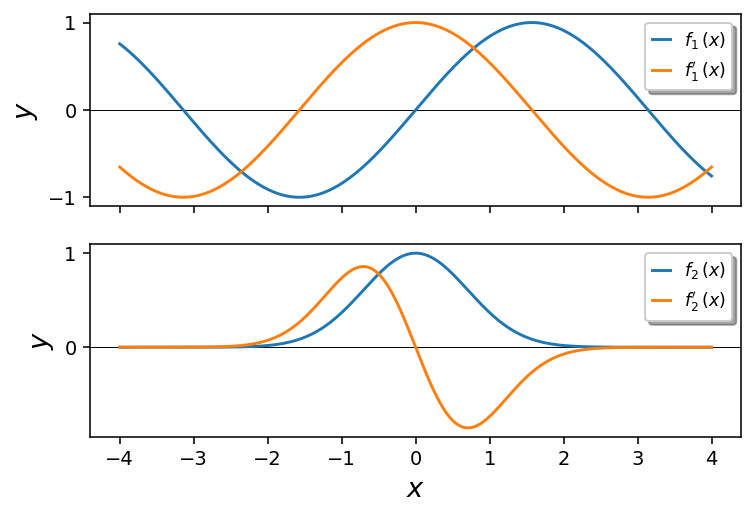

In [ ]:
if __name__ == '__main__':

  fig, axs = plt.subplots (2, 1, sharex = True,
                           figsize = (6, 4), dpi = 140)
  
  x  = np.linspace (a, b, N)
  y1 = f1 (x)
  y2 = f2 (x)
  
  dydx1 = derivative (x, y1)
  dydx2 = derivative (x, y2)

  axs[0].axhline (0, color = 'black',
                  linewidth = 0.5, zorder = 0)
  axs[0].plot (x, y1, label = r"$f_1\,(x)$")
  axs[0].plot (x, dydx1, label = r"$f_1'\,(x)$")
  axs[0].set_ylabel (r'$y$', fontsize = 14)
  axs[0].tick_params (axis = 'x', labelsize = 10)
  axs[0].tick_params (axis = 'y', labelsize = 10)
  axs[0].legend (loc = 1, shadow = True, framealpha = 1.0,
              handlelength = 1.0, fontsize = 9)

  axs[1].axhline (0, color = 'black',
                  linewidth = 0.5, zorder = 0)
  axs[1].plot (x, y2, label = r"$f_2\,(x)$")
  axs[1].plot (x, dydx2, label = r"$f_2'\,(x)$")
  axs[1].set_xlabel (r'$x$', fontsize = 14)
  axs[1].set_ylabel (r'$y$', fontsize = 14)
  axs[1].tick_params (axis = 'x', labelsize = 10)
  axs[1].tick_params (axis = 'y', labelsize = 10)
  axs[1].legend (loc = 1, shadow = True, framealpha = 1.0,
              handlelength = 1.0, fontsize = 9)

  plt.subplots_adjust (hspace = 0.2)

  plt.show ()

####Numerical integration

Numerical integration methods typically work splitting the domain of the function domain into many smaller intervals in which we approximated the integral using a polynomial of some degree.

\begin{equation}
  \int_{-1}^{1} e^{-2\,x^2}\,+\, e^{-5{(x\,-\,1)}^2}\,dx
  \,\approx\,1.707950874381...
\end{equation}
<br>
<br>

#####Integration using rectangles

\begin{equation}
  \int_{a}^{b} f\,(x)\,dx
  \,\approx\,\sum_{i\,=\,0}^{n\,-\,1} f\,(a\,+\,i\,h)\,h,
  \quad h\,=\,\left(\frac{b\,-\,a}{n\,-\,1}\right)
\end{equation}
<br>
<br>

In [ ]:
# Use the following function or define your own

if __name__ == "__main__":

  f = lambda x: np.exp (-2 * x ** 2) +\
                np.exp (-3 * (x - 1) ** 2)

In [ ]:
def integrateRectangle (a, b, n):
  """
  Performs the integration using rectangles
  """
  h = (b - a) / (n - 1)

  s = 0
  
  for i in range (n - 1):
  
    s += f (a + i * h) * h

  return s

In [ ]:
# Set the parameters below

# N: number of points

# n: number of integration points (must be odd!)

# a: left boundary of the domain
# b: right boundary of the domain

if __name__ == "__main__":

  N = 500

  n = 7

  a = -1.0
  b =  1.0

In [ ]:
from matplotlib.patches import Rectangle


Integral: 1.531341550274863


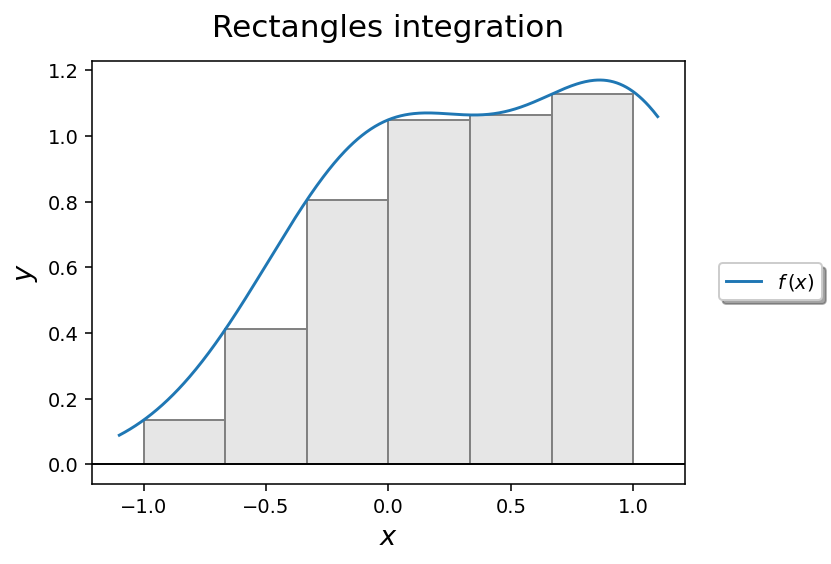

In [ ]:
  print ('\nIntegral: {:.15f}'.format (integrateRectangle (a, b, n)))
  
  x = np.linspace (1.1 * a, 1.1 * b, N)
  y = f (x)

  fig, ax = plt.subplots (figsize = (6, 4), dpi = 140)

  plt.plot (x, y, label = r'$f\,(x)$')

  for i in range (n - 1):
  
    h = (b - a) / (n - 1)
  
    rectangle = Rectangle ((a + i * h, 0), h, f (a + i * h),
                           facecolor = '0.9', edgecolor = '0.5',
                           zorder = 0)
    
    ax.add_patch (rectangle)
  
  plt.axhline (0, color = 'black',
               linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.title ('Rectangles integration',
              fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

#####Integration using trapezium rule

\begin{equation}
  \int_{a}^{b} f\,(x)\,dx
  \,\approx\,\sum_{i\,=\,0}^{n\,-\,1} \frac{f\,(a\,+\,i\,h)
  \,+\,f\,\left[a\,+\,(i\,+\,1)\,h\right]}{2}\,h,
  \qquad h\,=\,\left(\frac{b\,-\,a}{n\,-\,1}\right)
\end{equation}

In [ ]:
def integrateTrapezium (a, b, n):
  """
  Performs the integration using trapezium
  """
  h = (b - a) / (n - 1)

  s = 0
  
  for i in range (n - 1):
  
    s += (f (a + i * h) + f (a + (i + 1) * h)) * h / 2

  return s

In [ ]:
from matplotlib.patches import Polygon


Integral: 1.698007192906137


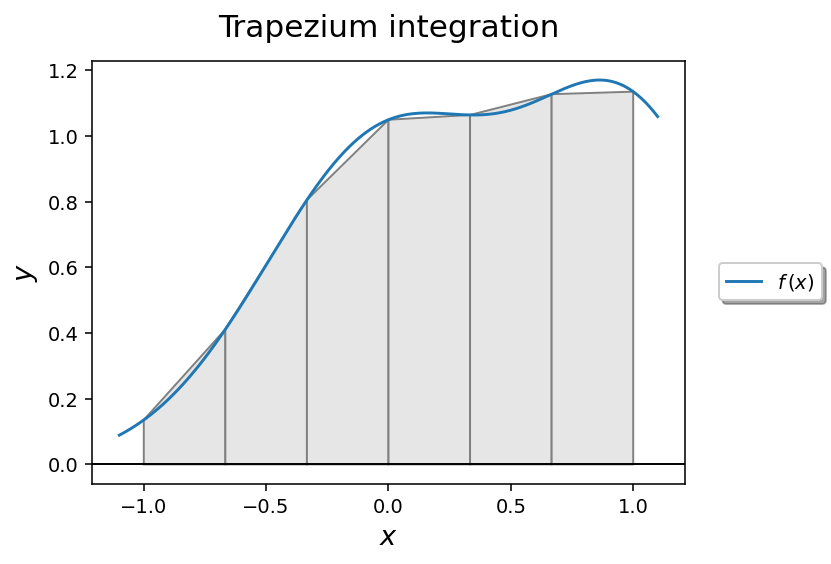

In [ ]:
  print ('\nIntegral: {:.15f}'.format (integrateTrapezium (a, b, n)))
 
  fig, ax = plt.subplots (figsize = (6, 4), dpi = 140)

  plt.plot (x, y, label = r'$f\,(x)$')

  for i in range (n - 1):
  
    h = (b - a) / (n - 1)

    polygon = Polygon (((a + i * h, 0), (a + (i + 1) * h, 0),
                        (a + (i + 1) * h, f (a + (i + 1) * h)),
                        (a + i * h, f (a + i * h))),
                       facecolor = '0.9', edgecolor = '0.5',
                       zorder = 0)
    
    ax.add_patch (polygon)

  plt.axhline (0, color = 'black',
               linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.title ('Trapezium integration',
              fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

#####Integration using Simpson's rule

\begin{equation}
  \int_{a}^{b} f\,(x)\,dx
  \,\approx\,\frac{h}{3}\left[f\,(a)\,+\,4\,f\,(x_1)
  \,+\,2\,f\,(x_2)\,+\,4\,f\,(x_3)\,+\,2\,f\,(x_4)\,+\,...
  \,+\,4\,f\,(x_{n\,-\,1})\,+\,f\,(b)\right],\\\\
  \quad h\,=\,\frac{b\,-\,a}{n\,-\,1}
  \quad \text{and} \quad x_i\,=\,a\,+\,i\,h
\end{equation}
<br>
<br>

In [ ]:
def integrateSimpson (a, b, n):
  """
  Performs the integration using Simpson's rule
  """
  h = (b - a) / (n - 1)

  s = f (a)
  
  for i in range (2, n - 2, 2):
  
    s += 2 * f (a + i * h)
 
  for i in range (1, n - 1, 2):

    s += 4 * f (a + i * h)

  s += f (b)  
  
  return h * s / 3


Integral: 1.707289979589080


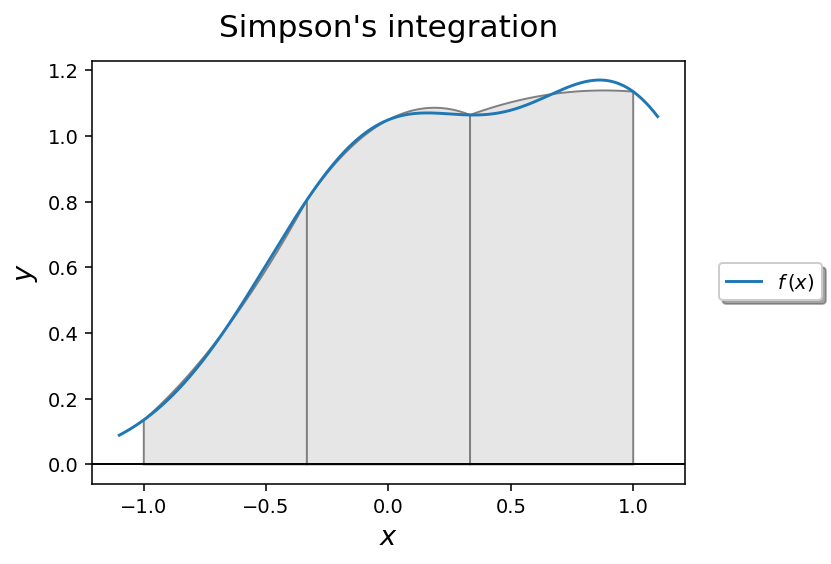

In [ ]:
  print ('\nIntegral: {:.15f}'.format (integrateSimpson (a, b, n)))
 
  fig, ax = plt.subplots (figsize = (6, 4), dpi = 140)

  plt.plot (x, y, label = r'$f\,(x)$')

  for i in range (0, n - 2, 2):
  
    h = (b - a) / (n - 1)

    nodes = np.linspace (a + i * h, a + (i + 2) * h, 3)
    
    xs = np.linspace (a + i * h, a + (i + 2) * h)
    ys = np.poly1d (np.polyfit (nodes, f (nodes), 2)) (xs)

    polygon = Polygon (((a + i * h, 0), *zip (xs, ys),
                        (a + (i + 2) * h, 0)),
                       facecolor = '0.9', edgecolor = '0.5',
                       zorder = 0)
    
    ax.add_patch (polygon)

  plt.axhline (0, color = 'black',
               linewidth = 1, zorder = 0)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.title ("Simpson's integration",
              fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

The same idea can be generalized to any number of dimensions for integrating functions in $\mathbb{R}^{n}$.
<br>
<br>

####References

Moczo, P. et al., 2002. 3D Heterogeneous Staggered-Grid Finite-Difference Modeling of Seismic Motion with Volume Harmonic and Arithmetic Averaging of Elastic Moduli and Densities, Bulletin of the Seismological Society of America, Vol. 92, n&deg;. 8, pp. 3042-3066, doi: 10.1785/0120010167
<br>
<br>
Moczo, P., Kristek, J. and Halada, L., 2004. The Finite-Difference Method for Seismologists. An Introduction, Comenius University Bratislava, ISBN 80-223-2000-5, pp. 1-47.
<br>
<br>
“Riemann sum.” *Wikipedia*, Wikimedia Foundation, 6 Aug. 2020, https://en.wikipedia.org/wiki/Riemann_sum [Accessed 5 August 2020].
<br>
<br>
“Simpson's rule.” *Wikipedia*, Wikimedia Foundation, 5 Aug. 2020, https://en.wikipedia.org/wiki/Simpson%27s_rule [Accessed 5 August 2020].
<br>
<br>
“Trapezoidal rule.” *Wikipedia*, Wikimedia Foundation, 11 Jul. 2020, https://en.wikipedia.org/wiki/Trapezoidal_rule [Accessed 5 August 2020].
<br>
<br>